# Quantifying Shakespeare
Analyzing the frequencies of different letters in Shakespeare's work.

(Data from: bit.ly/shakespeare-txt)

In this notebook, we will:
1. Read all of Shakespeare's works into a list of strings
2. Count the frequencies of letters used
3. Visualize the frequencies with a bar graph

In [26]:
from io import TextIOWrapper

def read_lines(file_name: str) -> list[str]:
    """Read a .txt file into a list of strings for each line"""
    lines: list[str] = []
    file_handle: TextIOWrapper = open(file_name, "r")
    for line in file_handle:
        # strip leading and trailing whitespace "   a dog   " -> "a dog"
        line = line.strip()
        # make everything lowercase
        line = line.lower()
        lines.append(line)
    file_handle.close()
    return lines

shakes_lines: list[str] = read_lines("../data/t8.shakespeare.txt")
print(len(shakes_lines))

124456


In [27]:
def tally(counts: dict[str, int], key: str) -> None:
    """Mutate counts by increasing the value stored at key by 1."""
    if key in counts:
        counts[key] += 1
    else:
        counts[key] = 1
    
def count_letters(lines: list[str]) -> dict[str, int]:
    """Counts the number of each letter in a string."""
    counts: dict[str, int] = dict()

    for word in lines:
        for char in word:
            char = char.lower()
            if char.isalpha():
                tally(counts, char)
    
    return counts

shakes_letters: dict[str, int] = count_letters(shakes_lines)
shakes_letters

{'t': 329775,
 'h': 236868,
 'i': 253990,
 's': 248989,
 'e': 447204,
 'x': 5294,
 'f': 80516,
 'l': 170019,
 'p': 58464,
 'r': 237864,
 'n': 243262,
 'd': 149462,
 'b': 61956,
 'y': 94370,
 'o': 314600,
 'j': 4779,
 'c': 88185,
 'g': 68199,
 'u': 128947,
 'a': 289150,
 'w': 89390,
 'm': 111452,
 'k': 35408,
 'v': 37569,
 'z': 1631,
 'q': 3582}

In [28]:
shakes_letters_list = list(shakes_letters.items())
shakes_letters_list = sorted(shakes_letters_list)
shakes_letters_sorted = dict(shakes_letters_list)
shakes_letters_sorted

{'a': 289150,
 'b': 61956,
 'c': 88185,
 'd': 149462,
 'e': 447204,
 'f': 80516,
 'g': 68199,
 'h': 236868,
 'i': 253990,
 'j': 4779,
 'k': 35408,
 'l': 170019,
 'm': 111452,
 'n': 243262,
 'o': 314600,
 'p': 58464,
 'q': 3582,
 'r': 237864,
 's': 248989,
 't': 329775,
 'u': 128947,
 'v': 37569,
 'w': 89390,
 'x': 5294,
 'y': 94370,
 'z': 1631}

<BarContainer object of 26 artists>

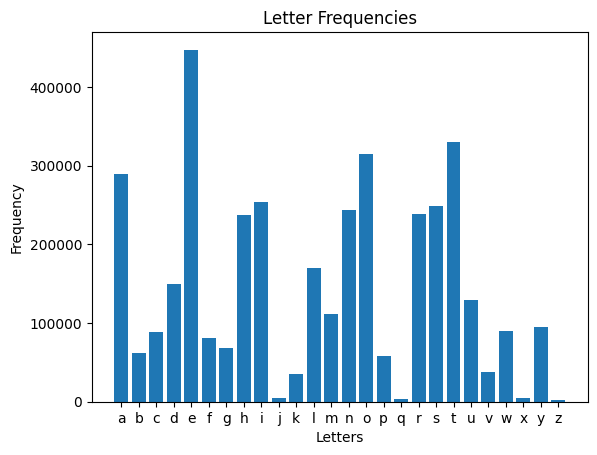

In [29]:
from matplotlib import pyplot as py

py.title("Letter Frequencies")
py.xlabel("Letters")
py.ylabel("Frequency")

x_values: list[str] = shakes_letters_sorted.keys()
y_values: list[str] = shakes_letters_sorted.values()
py.bar(x_values, y_values)